# GITHUB

https://github.com/Vladimirjon/MetodosNumericos_PasquelJohann/tree/main/Tarea08

# CONJUNTO DE EJERCICIOS 

### 1. Dado los datos:


| $x_i$ | 4.0   | 4.2   | 4.5   | 4.7   | 5.1   | 5.5   | 5.9   | 6.3   | 6.8   | 7.1   |
|---------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| $y_i$ | 102.56 | 130.11 | 113.18 | 142.05 | 167.53 | 195.14 | 224.87 | 256.73 | 299.50 | 326.72 |

In [12]:
x_i = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
y_i = [102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]

**a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error**

Dado el polinomio de grado 1 se procede a calcular con:
$$E = \sum_{i=1}^{n} \left[ y_i - (a_1 x_i + a_0) \right]^2$$

De la cual se obtendran dos ecuaciones (simplificadas): 
$$ \sum{(y_i-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i)(y_i-a_1 x_i -a_0)} = 0$$

Reemplazamos valores y calculamos $a_0$ y $a_1$

In [11]:
import numpy as np

def min_cuadrados_lineal(x, y):
    """
    Calcula el polinomio de mínimos cuadrados de grado 1 y proporciona resultados con etiquetas claras.
    
    Parámetros:
        x: Lista o array de valores x_i.
        y: Lista o array de valores y_i.
        
    Retorna:
        Resultados formateados con a_0, a_1, el error absoluto y el error relativo.
    """

    x = np.array(x)
    y = np.array(y)
    
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x**2)
    sum_xy = np.sum(x * y)
    
    # Resolver el sistema de ecuaciones normales
    A = np.array([[n, sum_x], [sum_x, sum_x2]])
    B = np.array([sum_y, sum_xy])
    a0, a1 = np.linalg.solve(A, B)
    
    # Calcular el polinomio y los errores
    y_pred = a0 + a1 * x
    error_absoluto = np.sum(np.abs(y - y_pred))
    error_relativo = np.sum(np.abs((y - y_pred) / y))
    

    return f"a_0 = {a0}, a_1 = {a1}, Error absoluto = {error_absoluto}, Error relativo = {error_relativo}"

**Resultado**

In [13]:
resultado = min_cuadrados_lineal(x_i, y_i)
print(resultado)

a_0 = -191.57241852647294, a_1 = 71.6102437202353, Error absoluto = 85.18657577738367, Error relativo = 0.5661123713129377


**Polinomio**

$$y = 71.61 x - 191.57 $$

**Gráfica**

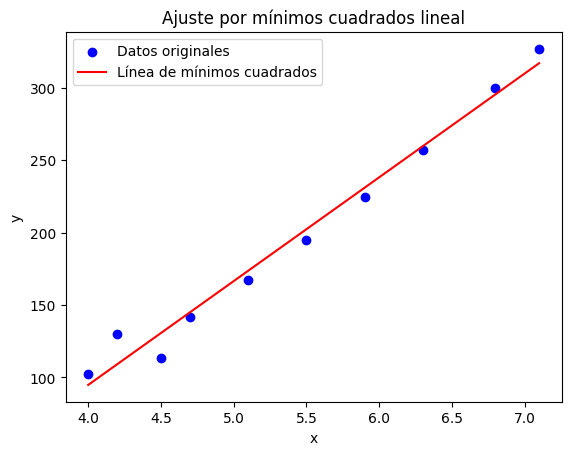

In [14]:
import matplotlib.pyplot as plt

a0, a1 = [float(value.split('=')[1]) for value in resultado.split(',')[:2]]

# Generar valores de x para la línea de regresión
x_line = np.linspace(min(x_i), max(x_i), 100)
y_line = a0 + a1 * x_line

# Graficar los puntos originales y la línea de regresión
plt.scatter(x_i, y_i, color='blue', label='Datos originales')
plt.plot(x_line, y_line, color='red', label='Línea de mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por mínimos cuadrados lineal')
plt.legend()
plt.show()

**b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error**

Dado el polinomio de grado 2 se procede a calcular con:
$$E = \sum_{i=1}^{n} \left[ y_i - (a_2 x_i ^{2}+ a_1 x_i + a_0) \right]^2$$

De la cual se obtendran tres ecuaciones (simplificadas): 
$$ \sum{(y_i-a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i)(y_i-a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i^{2})(y_i-a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$

Reemplazamos valores y calculamos $a_0$ , $a_1$ y $a_2$

In [32]:
import numpy as np

def min_cuadrados_cuadratico(x, y):
    """
    Calcula el polinomio de mínimos cuadrados de grado 2 y proporciona resultados con etiquetas claras.
    
    Parámetros:
        x: Lista o array de valores x_i.
        y: Lista o array de valores y_i.
        
    Retorna:
        Resultados formateados con a_0, a_1, a_2, el error absoluto y el error relativo.
    """
    
    x = np.array(x)
    y = np.array(y)
    
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x**2)
    sum_x3 = np.sum(x**3)
    sum_x4 = np.sum(x**4)
    sum_xy = np.sum(x * y)
    sum_x2y = np.sum(x**2 * y)
    
    A = np.array([
        [n, sum_x, sum_x2],
        [sum_x, sum_x2, sum_x3],
        [sum_x2, sum_x3, sum_x4]
    ])
    B = np.array([sum_y, sum_xy, sum_x2y])
    
    a0, a1, a2 = np.linalg.solve(A, B)
    
    y_pred = a0 + a1 * x + a2 * x**2
    error_absoluto = np.sum(np.abs(y - y_pred))
    error_relativo = np.sum(np.abs((y - y_pred) / y))
    
    return a0, a1, a2, error_absoluto, error_relativo

**Resultado**

In [33]:
a0, a1, a2, error_absoluto, error_relativo = min_cuadrados_cuadratico(x_i, y_i)
print(f"a_0 = {a0:.4f}, a_1 = {a1:.4f}, a_2 = {a2:.4f}, Error absoluto = {error_absoluto:.4f}, Error relativo = {error_relativo:.4f}")

a_0 = 51.0008, a_1 = -19.3086, a_2 = 8.2171, Error absoluto = 43.1587, Error relativo = 0.3327


**Polinomio**

$$y = 8.22 x^{2} -19.31 x +51$$

**Gráfica**

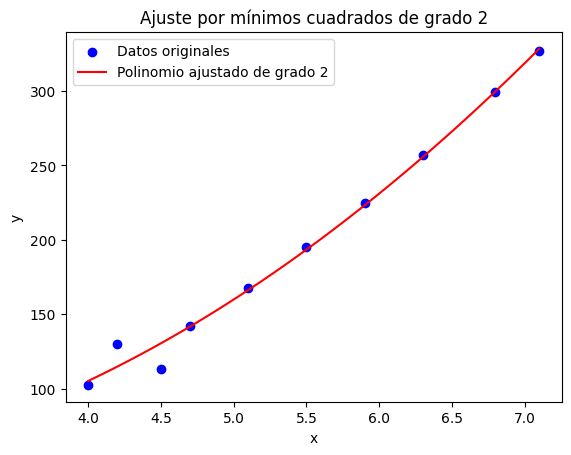

In [31]:
import matplotlib.pyplot as plt

# Graficar los datos originales y el polinomio ajustado
plt.scatter(x_i, y_i, color='blue', label='Datos originales')
x_range = np.linspace(min(x_i), max(x_i), 100)
y_range = a0 + a1 * x_range + a2 * x_range**2
plt.plot(x_range, y_range, color='red', label='Polinomio ajustado de grado 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por mínimos cuadrados de grado 2')
plt.legend()
plt.show()

**c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error**

Dado el polinomio de grado 3 se procede a calcular con:
$$E = \sum_{i=1}^{n} \left[ y_i - (a_3 x_i ^{3} + a_2 x_i ^{2}+ a_1 x_i + a_0) \right]^2$$

De la cual se obtendran cuatro ecuaciones (simplificadas): 
$$ \sum{(y_i-a_3 x_i ^{3} - a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i)(y_i-a_3 x_i ^{3} - a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i^{2})(y_i-a_3 x_i ^{3} - a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i^{3})(y_i-a_3 x_i ^{3} - a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$

Reemplazamos valores y calculamos $a_0$ , $a_1$ , $a_2$ y $a_3$

In [34]:
import numpy as np

def min_cuadrados_cubico(x, y):
    """
    Calcula el polinomio de mínimos cuadrados de grado 3 y proporciona resultados con etiquetas claras.
    
    Parámetros:
        x: Lista o array de valores x_i.
        y: Lista o array de valores y_i.
        
    Retorna:
        Resultados formateados con a_0, a_1, a_2, a_3, el error absoluto y el error relativo.
    """
    
    x = np.array(x)
    y = np.array(y)
    
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x**2)
    sum_x3 = np.sum(x**3)
    sum_x4 = np.sum(x**4)
    sum_x5 = np.sum(x**5)
    sum_x6 = np.sum(x**6)
    sum_xy = np.sum(x * y)
    sum_x2y = np.sum(x**2 * y)
    sum_x3y = np.sum(x**3 * y)
    
    A = np.array([
        [n, sum_x, sum_x2, sum_x3],
        [sum_x, sum_x2, sum_x3, sum_x4],
        [sum_x2, sum_x3, sum_x4, sum_x5],
        [sum_x3, sum_x4, sum_x5, sum_x6]
    ])
    B = np.array([sum_y, sum_xy, sum_x2y, sum_x3y])
    
    a0, a1, a2, a3 = np.linalg.solve(A, B)
    
    y_pred = a0 + a1 * x + a2 * x**2 + a3 * x**3
    error_absoluto = np.sum(np.abs(y - y_pred))
    error_relativo = np.sum(np.abs((y - y_pred) / y))
    
    return a0, a1, a2, a3, error_absoluto, error_relativo

**Resultado**

In [36]:
a0, a1, a2, a3, error_absoluto, error_relativo = min_cuadrados_cubico(x_i, y_i)
print(f"a_0 = {a0:.4f}, a_1 = {a1:.4f}, a_2 = {a2:.4f}, a_3 = {a3:.4f}, Error absoluto = {error_absoluto:.4f}, Error relativo = {error_relativo:.4f}")

a_0 = 469.1633, a_1 = -254.8748, a_2 = 51.5610, a_3 = -2.6068, Error absoluto = 46.4278, Error relativo = 0.3602


**Polinomio**

$$y = -2.61 x^{3} + 51.56 x^{2} - 254.87 x +469.16$$

**Gráfica**

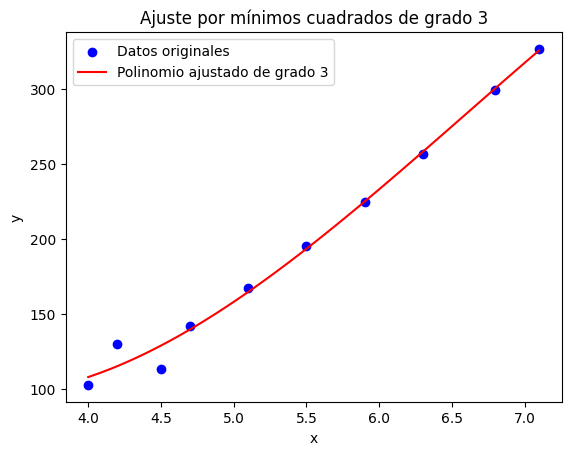

In [37]:
import matplotlib.pyplot as plt

# Graficar los datos originales y el polinomio ajustado
plt.scatter(x_i, y_i, color='blue', label='Datos originales')
x_range = np.linspace(min(x_i), max(x_i), 100)
y_range = a0 + a1 * x_range + a2 * x_range**2 + a3 * x_range**3
plt.plot(x_range, y_range, color='red', label='Polinomio ajustado de grado 3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por mínimos cuadrados de grado 3')
plt.legend()
plt.show()

**d. Construya el polinomio por mínimos cuadrados de la forma $be^{ax}$ y calcule el error**

Se procede a calcular con:
$$E = \sum_{i=1}^{n} ( y_i - b e^{a x_i}) ^2$$

De la cual se obtendran dos ecuaciones (simplificadas): 
$$ \sum ( y_i - b e^{a x_i})(e^{a x_i}) = 0$$
$$ \sum ( y_i - b e^{a x_i})(-b x_i e^{a x_i}) = 0$$

Reemplazamos valores y calculamos $a$ y $b$

In [55]:
from scipy.optimize import curve_fit
import numpy as np


def modelo_exponencial(x, b, a):
    """
    Modelo exponencial de la forma y = b * e^(a * x).
    
    Parámetros:
        x: Array de valores x_i.
        b: Parámetro b del modelo.
        a: Parámetro a del modelo.
    
    Retorna:
        Valores del modelo evaluados en x.
    """
    return b * np.exp(a * x)


In [56]:
def min_cuadrados_exponencial(x, y):
    """
    Calcula el ajuste exponencial de mínimos cuadrados para el modelo y = b * e^(a * x).
    
    Parámetros:
        x: Lista o array de valores x_i.
        y: Lista o array de valores y_i.
        
    Retorna:
        Resultados formateados con b, a, el error absoluto y el error relativo.
    """
    x = np.array(x)
    y = np.array(y)
    
    # Valores iniciales para b y a
    params_iniciales = [1, 0.1]
    
    # Ajustar el modelo usando curve_fit
    params_opt, params_cov = curve_fit(modelo_exponencial, x, y, p0=params_iniciales)
    b, a = params_opt
    
    # Calcular el modelo ajustado y los errores
    y_pred = modelo_exponencial(x, b, a)
    error_absoluto = np.sum(np.abs(y - y_pred))
    error_relativo = np.sum(np.abs((y - y_pred) / y))
    
    return b, a, error_absoluto, error_relativo

**Resultado**

In [57]:
b, a, error_absoluto, error_relativo = min_cuadrados_exponencial(x_i, y_i)
print(f"b = {b:.4f}, a = {a:.4f}, Error absoluto = {error_absoluto:.4f}, Error relativo = {error_relativo:.4f}")

b = 26.8408, a = 0.3549, Error absoluto = 68.4715, Error relativo = 0.4669


**Polinomio**

$$y = 26.84 e^{0.355 x}$$

**Gráfica**

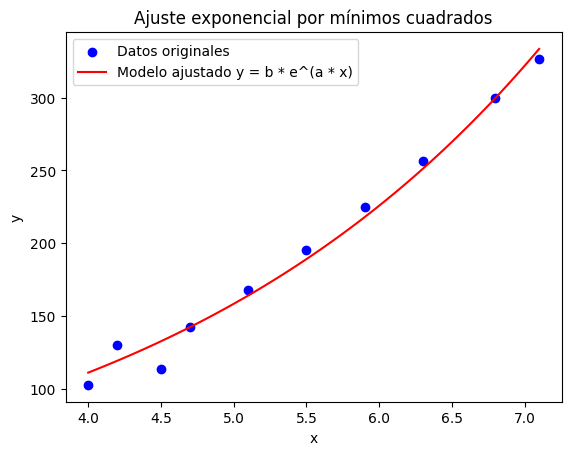

In [58]:
import matplotlib.pyplot as plt

# Graficar los datos originales y el modelo ajustado
plt.scatter(x_i, y_i, color='blue', label='Datos originales')
x_range = np.linspace(min(x_i), max(x_i), 100)
y_range = b * np.exp(a * x_range)
plt.plot(x_range, y_range, color='red', label='Modelo ajustado y = b * e^(a * x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste exponencial por mínimos cuadrados')
plt.legend()
plt.show()

**e. Construya el polinomio por mínimos cuadrados de la forma $bx^{a}$ y calcule el error**

Se procede a calcular con:
$$E = \sum_{i=1}^{n}  (y_i - b x_i ^{a})^{2}$$

De la cual se obtendran dos ecuaciones (simplificadas): 
$$ \sum (y_i - b x_i ^{a})(x_i ^{a}) = 0$$
$$ \sum (y_i - b x_i ^{a})[-b (ln (x_i)) x_i ^ {a}] = 0$$

Reemplazamos valores y calculamos $a$ y $b$

In [61]:
from scipy.optimize import curve_fit
import numpy as np


def modelo_potencial(x, b, a):
    """
    Modelo potencial de la forma y = b * x^a.
    
    Parámetros:
        x: Array de valores x_i.
        b: Parámetro b del modelo.
        a: Parámetro a del modelo.
    
    Retorna:
        Valores del modelo evaluados en x.
    """
    return b * x**a

In [62]:
def min_cuadrados_potencial(x, y):
    """
    Calcula el ajuste potencial de mínimos cuadrados para el modelo y = b * x^a.
    
    Parámetros:
        x: Lista o array de valores x_i.
        y: Lista o array de valores y_i.
        
    Retorna:
        Resultados formateados con b, a, el error absoluto y el error relativo.
    """
    x = np.array(x)
    y = np.array(y)
    
    # Valores iniciales para b y a
    params_iniciales = [1, 1]
    
    # Ajustar el modelo usando curve_fit
    params_opt, params_cov = curve_fit(modelo_potencial, x, y, p0=params_iniciales)
    b, a = params_opt
    
    # Calcular el modelo ajustado y los errores
    y_pred = modelo_potencial(x, b, a)
    error_absoluto = np.sum(np.abs(y - y_pred))
    error_relativo = np.sum(np.abs((y - y_pred) / y))
    
    return b, a, error_absoluto, error_relativo

**Resultado**

In [63]:
b, a, error_absoluto, error_relativo = min_cuadrados_potencial(x_i, y_i)
print(f"b = {b:.4f}, a = {a:.4f}, Error absoluto = {error_absoluto:.4f}, Error relativo = {error_relativo:.4f}")

b = 6.2840, a = 2.0152, Error absoluto = 35.2021, Error relativo = 0.2855


**Polinomio**

$$y = 6,284 x ^ {2,015}$$

**Gráfica**

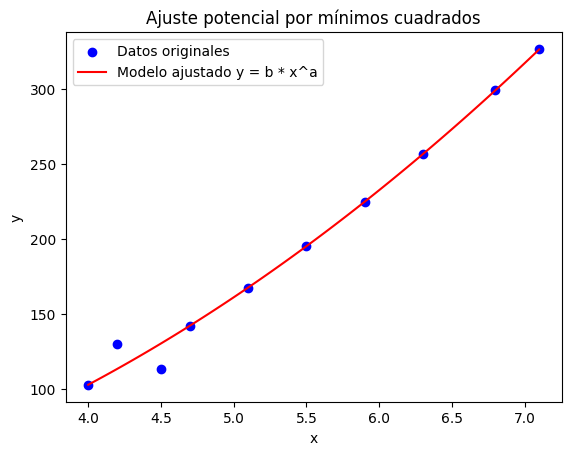

In [64]:
import matplotlib.pyplot as plt

# Graficar los datos originales y el modelo ajustado
plt.scatter(x_i, y_i, color='blue', label='Datos originales')
x_range = np.linspace(min(x_i), max(x_i), 100)
y_range = b * x_range**a
plt.plot(x_range, y_range, color='red', label='Modelo ajustado y = b * x^a')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste potencial por mínimos cuadrados')
plt.legend()
plt.show()

#### 1.1 Comparación de resultados

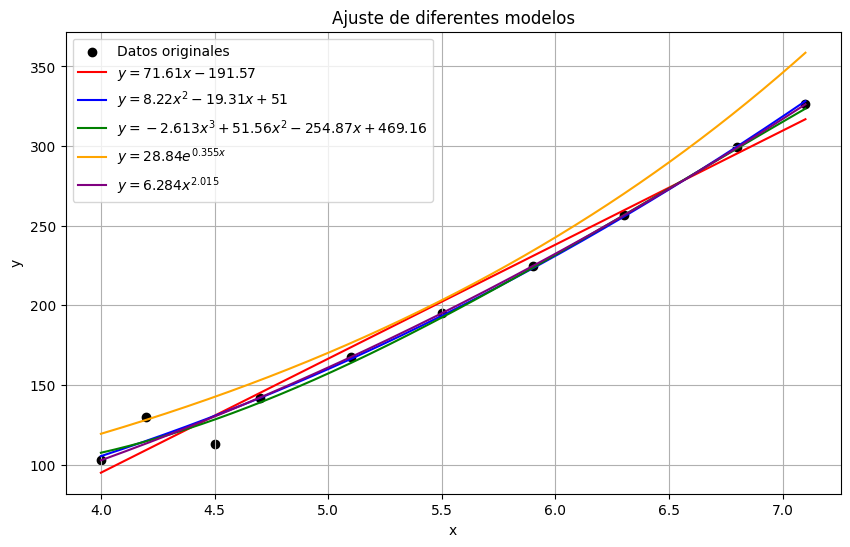

In [83]:
import matplotlib.pyplot as plt
import numpy as np


# Valores para graficar las funciones
x_range = np.linspace(min(x_i), max(x_i), 500)

# Funciones
y_lineal = 71.61 * x_range - 191.57
y_cuadratica = 8.22 * x_range**2 - 19.31 * x_range + 51
y_cubica = -2.613 * x_range**3 + 51.56 * x_range**2 - 254.87 * x_range + 469.16
y_exponencial = 28.84 * np.exp(0.355 * x_range)
y_potencial = 6.284 * x_range**2.015

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(x_i, y_i, color='black', label='Datos originales')
plt.plot(x_range, y_lineal, label=r'$y = 71.61x - 191.57$', color='red')
plt.plot(x_range, y_cuadratica, label=r'$y = 8.22x^2 - 19.31x + 51$', color='blue')
plt.plot(x_range, y_cubica, label=r'$y = -2.613x^3 + 51.56x^2 - 254.87x + 469.16$', color='green')
plt.plot(x_range, y_exponencial, label=r'$y = 28.84e^{0.355x}$', color='orange')
plt.plot(x_range, y_potencial, label=r'$y = 6.284x^{2.015}$', color='purple')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de diferentes modelos')
plt.legend()
plt.grid()
plt.show()

### 2. Dado los siguientes datos repetir el ejercicio:

| $x_i$ | 0.2   | 0.3   | 0.6   | 0.9   | 1.1   | 1.3   | 1.4   | 1.6   | 
|---------|-------|-------|-------|-------|-------|-------|-------|-------|
| $y_i$ | 0.050446 | 0.098426 | 0.33277 | 0.72660 | 1.0972 | 1.5697 | 1.8487 | 2.5015 | 

In [66]:
x_i2 = [0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6]
y_i2 = [0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015]

**a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error**

Dado el polinomio de grado 1 se procede a calcular con:
$$E = \sum_{i=1}^{n} \left[ y_i - (a_1 x_i + a_0) \right]^2$$

De la cual se obtendran dos ecuaciones (simplificadas): 
$$ \sum{(y_i-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i)(y_i-a_1 x_i -a_0)} = 0$$

Reemplazamos valores y calculamos $a_0$ y $a_1$

**Resultado**

In [68]:
resultado = min_cuadrados_lineal(x_i2, y_i2)
print(resultado)

a_0 = -0.5124568240000005, a_1 = 1.6655400800000004, Error absoluto = 1.439018032, Error relativo = 6.917158936100542


**Polinomio**

$$y = 1.665 x - 0.512$$

**Gráfica**

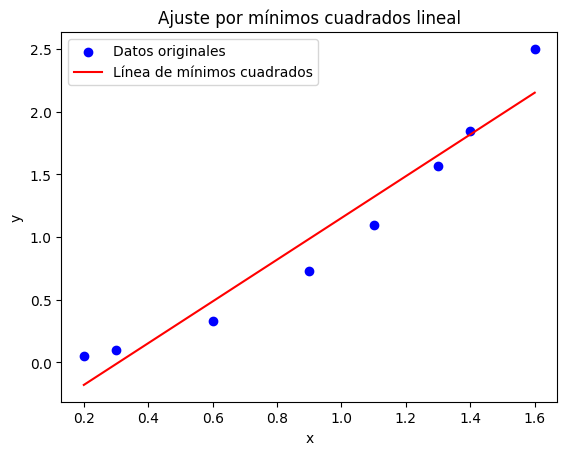

In [70]:
import matplotlib.pyplot as plt

a0, a1 = [float(value.split('=')[1]) for value in resultado.split(',')[:2]]

# Generar valores de x para la línea de regresión
x_line = np.linspace(min(x_i2), max(x_i2), 100)
y_line = a0 + a1 * x_line

# Graficar los puntos originales y la línea de regresión
plt.scatter(x_i2, y_i2, color='blue', label='Datos originales')
plt.plot(x_line, y_line, color='red', label='Línea de mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por mínimos cuadrados lineal')
plt.legend()
plt.show()

**b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error**

Dado el polinomio de grado 2 se procede a calcular con:
$$E = \sum_{i=1}^{n} \left[ y_i - (a_2 x_i ^{2}+ a_1 x_i + a_0) \right]^2$$

De la cual se obtendran tres ecuaciones (simplificadas): 
$$ \sum{(y_i-a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i)(y_i-a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i^{2})(y_i-a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$

Reemplazamos valores y calculamos $a_0$ , $a_1$ y $a_2$

**Resultado**

In [71]:
a0, a1, a2, error_absoluto, error_relativo = min_cuadrados_cuadratico(x_i2, y_i2)
print(f"a_0 = {a0:.4f}, a_1 = {a1:.4f}, a_2 = {a2:.4f}, Error absoluto = {error_absoluto:.4f}, Error relativo = {error_relativo:.4f}")

a_0 = 0.0851, a_1 = -0.3114, a_2 = 1.1294, Error absoluto = 0.1262, Error relativo = 0.5336


**Polinomio**

$$y=1.129x^{2} -0.311 x + 0.085$$

**Gráfica**

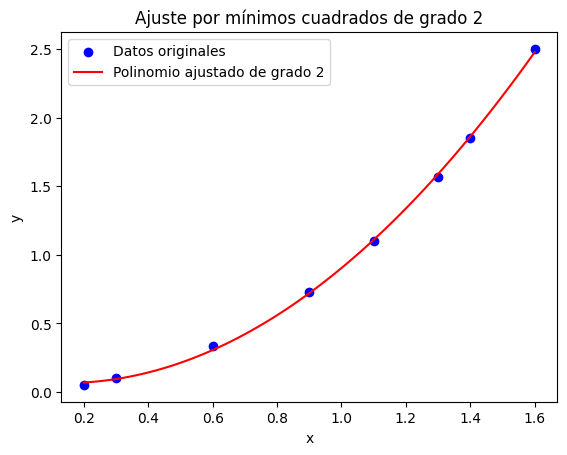

In [72]:
import matplotlib.pyplot as plt

# Graficar los datos originales y el polinomio ajustado
plt.scatter(x_i2, y_i2, color='blue', label='Datos originales')
x_range = np.linspace(min(x_i2), max(x_i2), 100)
y_range = a0 + a1 * x_range + a2 * x_range**2
plt.plot(x_range, y_range, color='red', label='Polinomio ajustado de grado 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por mínimos cuadrados de grado 2')
plt.legend()
plt.show()

**c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error**

Dado el polinomio de grado 3 se procede a calcular con:
$$E = \sum_{i=1}^{n} \left[ y_i - (a_3 x_i ^{3} + a_2 x_i ^{2}+ a_1 x_i + a_0) \right]^2$$

De la cual se obtendran cuatro ecuaciones (simplificadas): 
$$ \sum{(y_i-a_3 x_i ^{3} - a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i)(y_i-a_3 x_i ^{3} - a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i^{2})(y_i-a_3 x_i ^{3} - a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i^{3})(y_i-a_3 x_i ^{3} - a_2 x_i ^{2}-a_1 x_i -a_0)} = 0$$

Reemplazamos valores y calculamos $a_0$ , $a_1$ , $a_2$ y $a_3$

**Resultado**

In [73]:
a0, a1, a2, a3, error_absoluto, error_relativo = min_cuadrados_cubico(x_i2, y_i2)
print(f"a_0 = {a0:.4f}, a_1 = {a1:.4f}, a_2 = {a2:.4f}, a_3 = {a3:.4f}, Error absoluto = {error_absoluto:.4f}, Error relativo = {error_relativo:.4f}")

a_0 = -0.0184, a_1 = 0.2484, a_2 = 0.4029, a_3 = 0.2662, Error absoluto = 0.0061, Error relativo = 0.0341


**Polinomio**

$$y = 0,266 x^3 + 0,402 x^2 + 0,248 x - 0,018$$

**Gráfica**

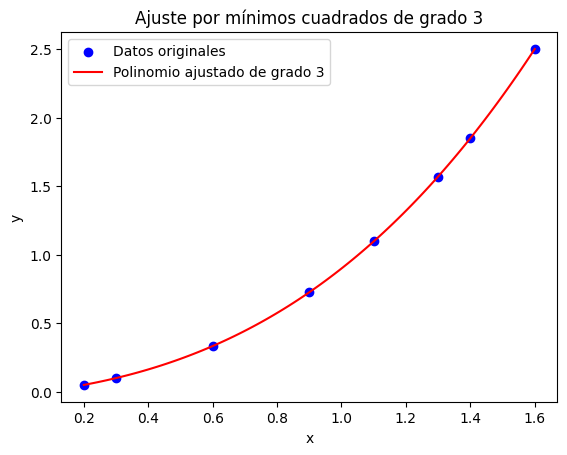

In [74]:
import matplotlib.pyplot as plt

# Graficar los datos originales y el polinomio ajustado
plt.scatter(x_i2, y_i2, color='blue', label='Datos originales')
x_range = np.linspace(min(x_i2), max(x_i2), 100)
y_range = a0 + a1 * x_range + a2 * x_range**2 + a3 * x_range**3
plt.plot(x_range, y_range, color='red', label='Polinomio ajustado de grado 3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por mínimos cuadrados de grado 3')
plt.legend()
plt.show()

**d. Construya el polinomio por mínimos cuadrados de la forma $be^{ax}$ y calcule el error**

Se procede a calcular con:
$$E = \sum_{i=1}^{n} ( y_i - b e^{a x_i}) ^2$$

De la cual se obtendran dos ecuaciones (simplificadas): 
$$ \sum ( y_i - b e^{a x_i})(e^{a x_i}) = 0$$
$$ \sum ( y_i - b e^{a x_i})(-b x_i e^{a x_i}) = 0$$

Reemplazamos valores y calculamos $a$ y $b$

**Resultado**

In [75]:
b, a, error_absoluto, error_relativo = min_cuadrados_exponencial(x_i2, y_i2)
print(f"b = {b:.4f}, a = {a:.4f}, Error absoluto = {error_absoluto:.4f}, Error relativo = {error_relativo:.4f}")

b = 0.1326, a = 1.8583, Error absoluto = 0.6773, Error relativo = 4.5973


**Polinomio**

$$y=0,132 e ^{1,858x}$$

**Gráfica**

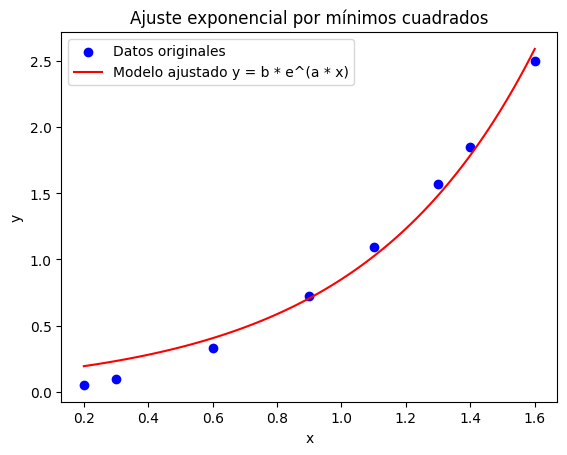

In [76]:
import matplotlib.pyplot as plt

# Graficar los datos originales y el modelo ajustado
plt.scatter(x_i2, y_i2, color='blue', label='Datos originales')
x_range = np.linspace(min(x_i2), max(x_i2), 100)
y_range = b * np.exp(a * x_range)
plt.plot(x_range, y_range, color='red', label='Modelo ajustado y = b * e^(a * x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste exponencial por mínimos cuadrados')
plt.legend()
plt.show()

**e. Construya el polinomio por mínimos cuadrados de la forma $bx^{a}$ y calcule el error**

Se procede a calcular con:
$$E = \sum_{i=1}^{n}  (y_i - b x_i ^{a})^{2}$$

De la cual se obtendran dos ecuaciones (simplificadas): 
$$ \sum (y_i - b x_i ^{a})(x_i ^{a}) = 0$$
$$ \sum (y_i - b x_i ^{a})[-b (ln (x_i)) x_i ^ {a}] = 0$$

Reemplazamos valores y calculamos $a$ y $b$

**Resultado**

In [77]:
b, a, error_absoluto, error_relativo = min_cuadrados_potencial(x_i2, y_i2)
print(f"b = {b:.4f}, a = {a:.4f}, Error absoluto = {error_absoluto:.4f}, Error relativo = {error_relativo:.4f}")

b = 0.9055, a = 2.1428, Error absoluto = 0.1537, Error relativo = 0.8677


**Polinomio**

$$ y = 0.905x^{2.143}$$

**Gráfica**

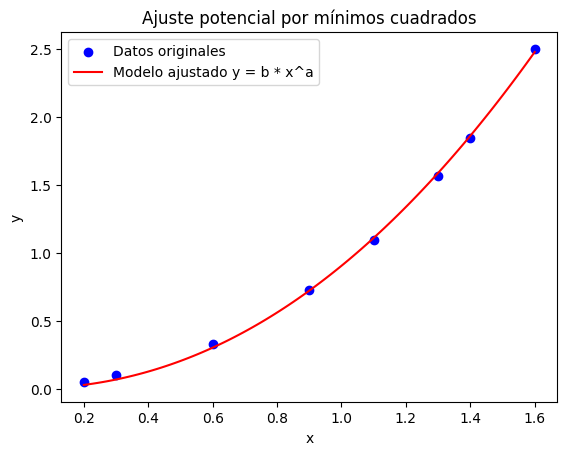

In [78]:
import matplotlib.pyplot as plt

# Graficar los datos originales y el modelo ajustado
plt.scatter(x_i2, y_i2, color='blue', label='Datos originales')
x_range = np.linspace(min(x_i2), max(x_i2), 100)
y_range = b * x_range**a
plt.plot(x_range, y_range, color='red', label='Modelo ajustado y = b * x^a')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste potencial por mínimos cuadrados')
plt.legend()
plt.show()

#### 2.1 Comparación de resultados

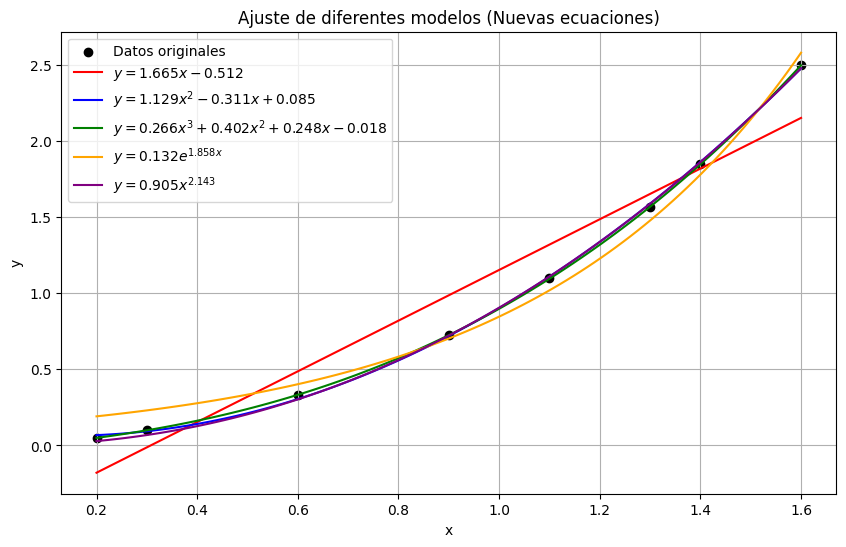

In [81]:
# Funciones nuevas basadas en las ecuaciones proporcionadas
y_lineal_nueva = 1.665 * x_range - 0.512
y_cuadratica_nueva = 1.129 * x_range**2 - 0.311 * x_range + 0.085
y_cubica_nueva = 0.266 * x_range**3 + 0.402 * x_range**2 + 0.248 * x_range - 0.018
y_exponencial_nueva = 0.132 * np.exp(1.858 * x_range)
y_potencial_nueva = 0.905 * x_range**2.143

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(x_i2, y_i2, color='black', label='Datos originales')
plt.plot(x_range, y_lineal_nueva, label=r'$y = 1.665x - 0.512$', color='red')
plt.plot(x_range, y_cuadratica_nueva, label=r'$y = 1.129x^2 - 0.311x + 0.085$', color='blue')
plt.plot(x_range, y_cubica_nueva, label=r'$y = 0.266x^3 + 0.402x^2 + 0.248x - 0.018$', color='green')
plt.plot(x_range, y_exponencial_nueva, label=r'$y = 0.132e^{1.858x}$', color='orange')
plt.plot(x_range, y_potencial_nueva, label=r'$y = 0.905x^{2.143}$', color='purple')

# Personalización
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de diferentes modelos (Nuevas ecuaciones)')
plt.legend()
plt.grid()

# Mostrar gráfica
plt.show()


### 3. La siguiente tabla muestra los promedios
De los puntos del colegio de 20 especialistas en matemáticas y ciencias computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos. 

| Puntuación ACT | Promedio de puntos | Puntuación ACT | Promedio de puntos |
|----------------|--------------------|----------------|--------------------|
| 28             | 3.84              | 29             | 3.75              |
| 25             | 3.21              | 28             | 3.65              |
| 28             | 3.23              | 27             | 3.87              |
| 27             | 3.63              | 29             | 3.75              |
| 28             | 3.75              | 21             | 1.66              |
| 33             | 3.20              | 28             | 3.12              |
| 28             | 3.41              | 28             | 2.96              |
| 29             | 3.38              | 26             | 2.92              |
| 23             | 3.53              | 30             | 3.10              |
| 27             | 2.03              | 24             | 2.81              |


In [84]:
x_ACT = [28, 25, 28, 27, 28, 33, 29, 23, 29, 27, 29, 28, 27, 21, 28, 28, 26, 30, 24]
y_ACT = [3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 3.75, 3.65, 3.87, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81]

Dado el polinomio de grado 1 se procede a calcular con:
$$E = \sum_{i=1}^{n} \left[ y_i - (a_1 x_i + a_0) \right]^2$$

De la cual se obtendran dos ecuaciones (simplificadas): 
$$ \sum{(y_i-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i)(y_i-a_1 x_i -a_0)} = 0$$

Reemplazamos valores y calculamos $a_0$ y $a_1$

**Resultado**

In [86]:
resultado = min_cuadrados_lineal(x_ACT, y_ACT)
print(resultado)

a_0 = 0.41300906842540025, a_1 = 0.10270816158285213, Error absoluto = 7.701162407254738, Error relativo = 2.751659424682326


**Polinomio**

$$y = 0.1027x +0.413$$

**Gráfica**

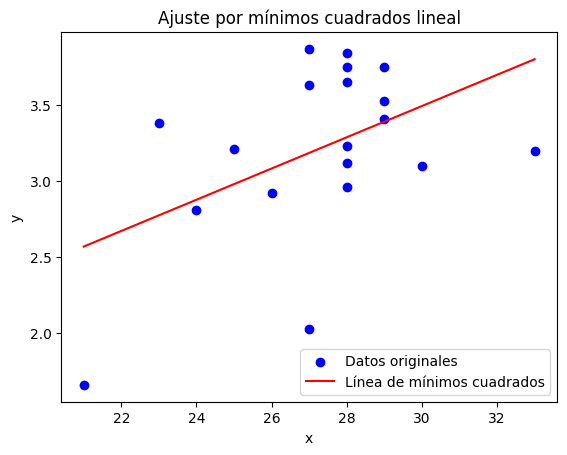

In [87]:
import matplotlib.pyplot as plt

a0, a1 = [float(value.split('=')[1]) for value in resultado.split(',')[:2]]

# Generar valores de x para la línea de regresión
x_line = np.linspace(min(x_ACT), max(x_ACT), 100)
y_line = a0 + a1 * x_line

# Graficar los puntos originales y la línea de regresión
plt.scatter(x_ACT, y_ACT, color='blue', label='Datos originales')
plt.plot(x_line, y_line, color='red', label='Línea de mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por mínimos cuadrados lineal')
plt.legend()
plt.show()

### 4. El siguiente conjunto de datos
Presentado al Subcomité Antimonopolio del Senado, muestra las características comparativas de supervivencia durante un choque de automóviles de diferentes clases. Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muestra el porcentaje de vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria). 

|   | Tipo | Peso promedio | Porcentaje de presentación |
|---|------|---------------|----------------------------|
| 1 | Regular lujoso doméstico | 4800 lb | 3.1 |
| 2 | Regular intermedio doméstico | 3700 lb | 4.0 |
| 3 | Regular económico doméstico | 3400 lb | 5.2 |
| 4 | Compacto domnómico doméstico | 2800 lb | 6.4 |
| 5 | Compacto extranjero | 1900 lb | 9.6 |

In [88]:
x_peso = [4800, 3700, 3400, 2800, 1900]  
y_porcentaje = [3.1, 4.0, 5.2, 6.4, 9.6]  

Dado el polinomio de grado 1 se procede a calcular con:
$$E = \sum_{i=1}^{n} \left[ y_i - (a_1 x_i + a_0) \right]^2$$

De la cual se obtendran dos ecuaciones (simplificadas): 
$$ \sum{(y_i-a_1 x_i -a_0)} = 0$$
$$ \sum{(x_i)(y_i-a_1 x_i -a_0)} = 0$$

Reemplazamos valores y calculamos $a_0$ y $a_1$

**Resultado**

In [89]:
resultado = min_cuadrados_lineal(x_peso, y_porcentaje)
print(resultado)

a_0 = 13.146499567847908, a_1 = -0.002254969749351779, Error absoluto = 3.0305963699222143, Error relativo = 0.6497676713220445


**Polinomio**

$$y=-0.00225x+13.14649$$

**Gráfica**

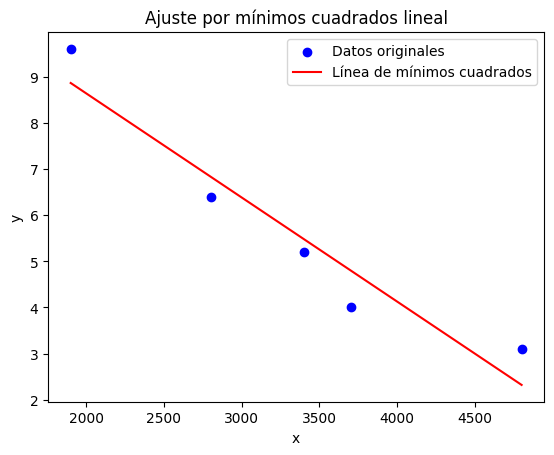

In [90]:
import matplotlib.pyplot as plt

a0, a1 = [float(value.split('=')[1]) for value in resultado.split(',')[:2]]

# Generar valores de x para la línea de regresión
x_line = np.linspace(min(x_peso), max(x_peso), 100)
y_line = a0 + a1 * x_line

# Graficar los puntos originales y la línea de regresión
plt.scatter(x_peso, y_porcentaje, color='blue', label='Datos originales')
plt.plot(x_line, y_line, color='red', label='Línea de mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por mínimos cuadrados lineal')
plt.legend()
plt.show()